# RET1 Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neuropacks import RET1 as Retina

%matplotlib inline

First, we need the paths to the data and the randomly generated numbers

In [2]:
data_path = '/Users/psachdeva/data/ret1/data/20080516_R1.mat'
random_path = '/Users/psachdeva/data/ret1/data/ran1.bin'

In [3]:
# create retina object
retina = Retina(
    data_path=data_path,
    random_path=random_path
)

We can look at the number of cells and number of recordings.

In [4]:
print("Number of cells:", retina.n_cells)
print("Number of recordings:", retina.n_recordings)

Number of cells: 7
Number of recordings: 3


The shape of our STRF will depend on how many frames we want in the window. The `get_dimensions_for_recording()` function provides us with the shape given a recording and window length (in seconds).

In [5]:
dimensions = retina.get_dimensions_for_recording(
    recording_idx=0,
    window_length=0.33
)
print("Number of features:", dimensions[0])
print("Number of samples:", dimensions[1])

Number of features: 640
Number of samples: 89898


The main use of this package is to calculate spatio-temporal receptive fields. We'll do that using OLS, below.

In [6]:
strf, intercept, training_scores, test_scores = retina.calculate_strf_for_neurons(
    method="OLS",
    recording_idx=0,
    window_length=0.33,
    cells=2,
    return_scores=True,
    test_frac=0.05
)

We can plot the STRF we just calculated.

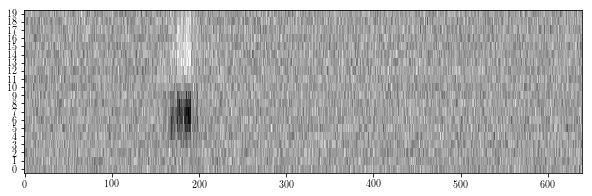

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.imshow(strf, cmap='gray')

ax.set_aspect('auto')

ax.tick_params(labelsize=10)
ax.set_yticks(np.arange(strf.shape[0]))

plt.show()

Lastly, we can examine the explained variance of both the training and test sets as a function of the frame.

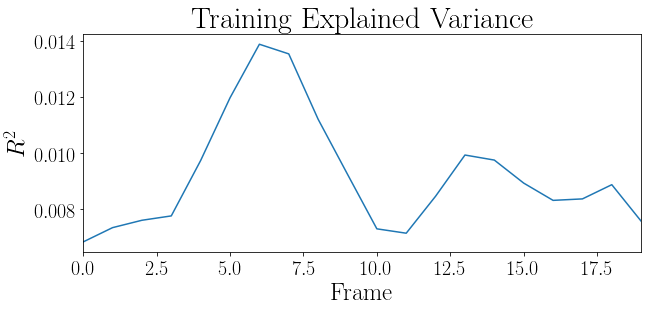

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(training_scores[0])
ax.set_xlim([0, 19])
ax.set_xlabel('Frame')
ax.set_ylabel(r'$R^2$')
ax.set_title('Training Explained Variance')

plt.show()

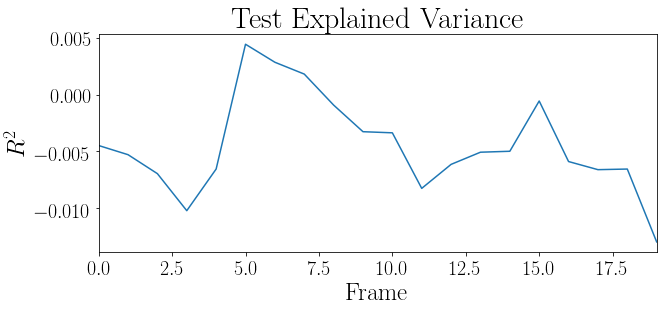

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(test_scores[0])
ax.set_xlim([0, 19])
ax.set_xlabel('Frame')
ax.set_ylabel(r'$R^2$')
ax.set_title('Test Explained Variance')

plt.show()